Подготовка данных для ВКР_часть 2

In [1]:
# импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from pandas import read_excel, DataFrame, Series
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from numpy.random import seed
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from joblib import dump, load
from joblib import Parallel, delayed
import joblib

In [2]:
# импорт библиотек
import pandas as pd # необходима для чтения документов
import numpy as np # необходима для работы с массивами и линейной алгеброй
import matplotlib.pyplot as plt # необходима для отрисовки деревьев ()

from sklearn.tree import DecisionTreeClassifier # классификатор дерева решений (алг-м машинного обучения)
from sklearn import tree # 
from sklearn.model_selection import GridSearchCV # поиск по сетке для выбора лучшей модели (метод перебора)
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV # для разделения на обуч и тест выборки, для исп-я кросс-валидации, кросс-валидация
from sklearn.metrics import accuracy_score # процент правильно угаданных значений (это метрика, которую мы импортируем из метрик ск-лёрн)

from sklearn.cluster import KMeans # метод к-средних
from sklearn.datasets import make_blobs # метод генерации выборки по параметрам

In [4]:
# загрузка стандартизованного подготовленного ранее датасета из файла:
data_std = pd.read_excel(r"C:\Users\Alekseeva Aleksandra\Desktop\DS_МГТУ Баумана\ВКР\Подготовка данных для ВКР\data_std.xlsx")
# загрузка очищенного от выбросов датасета до нормализации:
df_clear = pd.read_excel(r"C:\Users\Alekseeva Aleksandra\Desktop\DS_МГТУ Баумана\ВКР\Подготовка данных для ВКР\df_clear.xlsx")

In [5]:
data_std.head()

,Unnamed: 0,Соотношение_матрица_наполнитель,Плотность,Модуль_упругости,Количество_отвердителя,Содержание_эпоксидных_групп,Температура_вспышки,Поверхностная_плотность,Модуль_упругости_при_растяжении,Прочность_при_растяжении,Потребление_смолы,Угол_нашивки,Шаг_нашивки,Плотность_нашивки
0,0,-1.196260,0.790727,0.001489,-2.254199,0.643790,-0.036187,-0.974837,-1.088732,1.148666,0.041294,-1.023787,-1.162360,0.226834
1,1,-1.196260,0.790727,0.001489,0.669189,-0.400666,0.354488,-0.974837,-1.088732,1.148666,0.041294,-1.023787,-0.763689,-0.930436
2,2,-0.172802,0.790727,0.044904,0.034925,0.024577,-0.036187,-0.974837,-1.088732,1.148666,0.041294,-1.023787,-0.763689,-0.040228
3,3,-0.176623,0.366820,0.029685,0.034925,0.024577,-0.036187,-0.974837,-1.088732,1.148666,0.041294,-1.023787,-0.763689,0.226834
4,4,-0.398622,-0.904900,0.209271,0.034925,0.024577,-0.036187,-0.974837,-1.088732,1.148666,0.041294,-1.023787,-0.763689,1.117043


In [6]:
df_clear.head()

,Unnamed: 0,Соотношение_матрица_наполнитель,Плотность,Модуль_упругости,Количество_отвердителя,Содержание_эпоксидных_групп,Температура_вспышки,Поверхностная_плотность,Модуль_упругости_при_растяжении,Прочность_при_растяжении,Потребление_смолы,Угол_нашивки,Шаг_нашивки,Плотность_нашивки
0,1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
1,3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
2,4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
3,5,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
4,6,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0


In [7]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       936 non-null    int64  
 1   Соотношение_матрица_наполнитель  936 non-null    float64
 2   Плотность                        936 non-null    float64
 3   Модуль_упругости                 936 non-null    float64
 4   Количество_отвердителя           936 non-null    float64
 5   Содержание_эпоксидных_групп      936 non-null    float64
 6   Температура_вспышки              936 non-null    float64
 7   Поверхностная_плотность          936 non-null    float64
 8   Модуль_упругости_при_растяжении  936 non-null    float64
 9   Прочность_при_растяжении         936 non-null    float64
 10  Потребление_смолы                936 non-null    float64
 11  Угол_нашивки                     936 non-null    int64  
 12  Шаг_нашивки           

In [8]:
df_clear.shape

(936, 14)

In [9]:
data_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       936 non-null    int64  
 1   Соотношение_матрица_наполнитель  936 non-null    float64
 2   Плотность                        936 non-null    float64
 3   Модуль_упругости                 936 non-null    float64
 4   Количество_отвердителя           936 non-null    float64
 5   Содержание_эпоксидных_групп      936 non-null    float64
 6   Температура_вспышки              936 non-null    float64
 7   Поверхностная_плотность          936 non-null    float64
 8   Модуль_упругости_при_растяжении  936 non-null    float64
 9   Прочность_при_растяжении         936 non-null    float64
 10  Потребление_смолы                936 non-null    float64
 11  Угол_нашивки                     936 non-null    float64
 12  Шаг_нашивки           

In [10]:
data_std.shape

(936, 14)

In [11]:
# удаление неинформативного столбца и сохранение результатов в новую переменную:
df_ml = data_std.drop(columns = 'Unnamed: 0')
df_cl = df_clear.drop(columns = 'Unnamed: 0')
# просмотр результатов удаления по первым пяти строкам:
df_ml.head()

,Соотношение_матрица_наполнитель,Плотность,Модуль_упругости,Количество_отвердителя,Содержание_эпоксидных_групп,Температура_вспышки,Поверхностная_плотность,Модуль_упругости_при_растяжении,Прочность_при_растяжении,Потребление_смолы,Угол_нашивки,Шаг_нашивки,Плотность_нашивки
0,-1.196260,0.790727,0.001489,-2.254199,0.643790,-0.036187,-0.974837,-1.088732,1.148666,0.041294,-1.023787,-1.162360,0.226834
1,-1.196260,0.790727,0.001489,0.669189,-0.400666,0.354488,-0.974837,-1.088732,1.148666,0.041294,-1.023787,-0.763689,-0.930436
2,-0.172802,0.790727,0.044904,0.034925,0.024577,-0.036187,-0.974837,-1.088732,1.148666,0.041294,-1.023787,-0.763689,-0.040228
3,-0.176623,0.366820,0.029685,0.034925,0.024577,-0.036187,-0.974837,-1.088732,1.148666,0.041294,-1.023787,-0.763689,0.226834
4,-0.398622,-0.904900,0.209271,0.034925,0.024577,-0.036187,-0.974837,-1.088732,1.148666,0.041294,-1.023787,-0.763689,1.117043


In [12]:
df_cl.head()

,Соотношение_матрица_наполнитель,Плотность,Модуль_упругости,Количество_отвердителя,Содержание_эпоксидных_групп,Температура_вспышки,Поверхностная_плотность,Модуль_упругости_при_растяжении,Прочность_при_растяжении,Потребление_смолы,Угол_нашивки,Шаг_нашивки,Плотность_нашивки
0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
1,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
2,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
3,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
4,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0


In [13]:
df_ml.shape

(936, 13)

In [14]:
df_cl.shape

(936, 13)

Разработка и обучение нескольких моделей для прогноза прочности при растяжении.
Обучение моделей предполагается производить со стандартными параметрами, после чего произвести поиск оптимальных параметров и посмотреть результат обучения с подобранными оптимальными параметрами.

Определение обучающей и тестовой выборки

In [15]:
# Определяем входные и целевые данные для переменной Прочность_при_растяжении: 
# В качестве целевых берём данные до нормализации, очищенные от выбросов
y_1 = df_clear[['Прочность_при_растяжении']] # целевая колонка
# В качестве входных данных берём нормализованные данные
x = df_ml[['Соотношение_матрица_наполнитель', 'Плотность','Модуль_упругости','Количество_отвердителя','Содержание_эпоксидных_групп','Температура_вспышки','Поверхностная_плотность','Модуль_упругости_при_растяжении','Потребление_смолы','Угол_нашивки','Шаг_нашивки','Плотность_нашивки']] # входные колонки

In [16]:
# Определяем входные и целевые данные для переменной Модуль_упругости_при_растяжении: 
# В качестве целевых берём данные до нормализации, очищенные от выбросов
y_2 = df_clear[['Модуль_упругости_при_растяжении']] # целевая колонка
# В качестве входных данных берём нормализованные данные
x_2 = df_ml[['Соотношение_матрица_наполнитель', 'Плотность','Модуль_упругости','Количество_отвердителя','Содержание_эпоксидных_групп','Температура_вспышки','Поверхностная_плотность','Прочность_при_растяжении','Потребление_смолы','Угол_нашивки','Шаг_нашивки','Плотность_нашивки']] # входные колонки

In [17]:
#разбиваем входные и целевые переменные на обучающую и тестовую выборки для переменной Прочность_при_растяжении:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x, y_1, test_size = 0.3, random_state = 42)

In [18]:
#разбиваем входные и целевые переменные на обучающую и тестовую выборки для переменной Модуль_упругости_при_растяжении:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size = 0.3, random_state = 42)

In [19]:
# средняя для прочности при растяжении:
sum(y_test_1[['Прочность_при_растяжении']]. mean(axis = 0))

2521.947291865534

In [20]:
# средняя для модуля упругости при растяжении:
sum(y_test_2[['Модуль_упругости_при_растяжении']]. mean(axis = 0))

73.46420506758587

Разработка и обучение моделей. Применяемые алгоритмы:
  а) Линейная регрессия;
  б) Случайный лес;
  в) К-ближайших соседей;
  г) Дерево решений;
  д) Метод опорных векторов;
  е) Градиентный бустинг.

а) Линейная регрессия

In [21]:
# Обучение модели (Прочность при растяжении)
LR = LinearRegression()
LR.fit(x_train_1, y_train_1)
y_pred_lr_1 = LR.predict(x_test_1)

In [22]:
y_pred_lr_1

array([[2320.46756323],
       [2456.18824039],
       [2519.54531764],
       [2516.67644664],
       [2433.42152175],
       [2466.89645777],
       [2414.51955422],
       [2405.39997381],
       [2337.61884212],
       [2523.78816832],
       [2418.1688027 ],
       [2503.65760269],
       [2396.62990221],
       [2350.27182729],
       [2480.88877032],
       [2494.32063817],
       [2486.32370719],
       [2531.66606235],
       [2452.08971159],
       [2423.80384569],
       [2494.20455111],
       [2347.8684931 ],
       [2350.51831227],
       [2465.78741644],
       [2368.85448254],
       [2516.94511687],
       [2448.34067961],
       [2493.62031046],
       [2302.78799885],
       [2514.39839944],
       [2547.94349974],
       [2499.33709911],
       [2400.24607539],
       [2362.14987999],
       [2390.25311046],
       [2457.1910184 ],
       [2580.48541643],
       [2468.82228031],
       [2445.08770926],
       [2600.30948296],
       [2469.46708518],
       [2401.562

In [23]:
# Обучение модели (Модуль упругости при растяжении)
LR_2 = LinearRegression()
LR_2.fit(x_train_2, y_train_2)
y_pred_lr_2 = LR_2.predict(x_test_2)

In [24]:
# Отклонение результатов прогноза от средней по фактическим данным (Прочность при растяжении):
def diff_meantest_pred(pred):
    for i in range(len(pred)):
        diff = pred[i] - sum(y_test_1[['Прочность_при_растяжении']]. mean(axis = 0))
    return sum(diff)
diff_meantest_pred(y_pred_lr_1)

74.5176879891601

Оценка потерь.

In [25]:
# используемые метрики (Прочность при растяжении):
mae_lr_1 = mean_absolute_error(y_test_1, y_pred_lr_1) # средняя абсолютная погрешность
mse_lr_1 = mean_squared_error(y_test_1, y_pred_lr_1) # средняя квадратическая ошибка
r2_lr_1 = r2_score(y_test_1, y_pred_lr_1) # коэффициент детерминации

In [26]:
# используемые метрики (Модуль упругости при растяжении):
mae_lr_2 = mean_absolute_error(y_test_2, y_pred_lr_2) # средняя абсолютная погрешность
mse_lr_2 = mean_squared_error(y_test_2, y_pred_lr_2) # средняя квадратическая ошибка
r2_lr_2 = r2_score(y_test_2, y_pred_lr_2) # коэффициент детерминации

In [27]:
#Функция для сравнения результатов предсказаний с моделью, выдающей среднее значение по тестовой выборке (Прочность):
def mean_model(y_test_1):
    return [np.mean(y_test_1) for _ in range(len(y_test_1))]
y_1_pred_mean = mean_model(y_test_1)

In [28]:
# Метрики модели, выдающей среднее значение (Прочность при растяжении):
mae_lr_mean = mean_absolute_error(y_test_1, y_1_pred_mean)
mse_lr_mean = mean_squared_error(y_test_1, y_1_pred_mean)
r2_lr_mean = r2_score(y_test_1, y_1_pred_mean)
# Вывод значений метрик
print('Результаты линейной регрессии:')    
print('Средняя абсолютная погрешность модели: ', mae_lr_mean)
print('Средняя квадратическая ошибка модели: ', mse_lr_mean)
print('Коэфициент детерминации модели: ', r2_lr_mean)

Результаты линейной регрессии:
Средняя абсолютная погрешность модели:  355.6341522874331
Средняя квадратическая ошибка модели:  204106.369007525
Коэфициент детерминации модели:  1.1102230246251565e-16


In [29]:
# Вывод значений метрик (Прочность при растяжении):
print('Результаты линейной регрессии:')    
print('Средняя абсолютная погрешность модели: ', mae_lr_1)
print('Средняя квадратическая ошибка модели: ', mse_lr_1)
print('Коэфициент детерминации модели: ', r2_lr_1)
print('Средняя по фактическим данным', sum(y_test_1[['Прочность_при_растяжении']]. mean(axis = 0)))

Результаты линейной регрессии:
Средняя абсолютная погрешность модели:  363.1440684032817
Средняя квадратическая ошибка модели:  213699.14586333028
Коэфициент детерминации модели:  -0.04699890994313649
Средняя по фактическим данным 2521.947291865534


Выводы: имеем недопустимо большие значения MAE и MSE. Отрицательный коэффициент детерминации модели говорит о том, что модель даёт неоднозначные результаты и предсказывает хуже, чем результаты модели, выдающей среднее значение, что подтверждается сравнительными данными оценок.

In [30]:
# Вывод значений метрик (Модуль упругости при растяжении):
print('Результаты линейной регрессии:')    
print('Средняя абсолютная погрешность модели: ', mae_lr_2)
print('Средняя квадратическая ошибка модели: ', mse_lr_2)
print('Коэфициент детерминации модели: ', r2_lr_2)
print('Средняя по фактическим данным', sum(y_test_2[['Модуль_упругости_при_растяжении']]. mean(axis = 0)))

Результаты линейной регрессии:
Средняя абсолютная погрешность модели:  2.414573330381647
Средняя квадратическая ошибка модели:  8.759731042865319
Коэфициент детерминации модели:  -0.005221985661028938
Средняя по фактическим данным 73.46420506758587


Визуализация полученных данных. Сравнение с фактическими значениями.

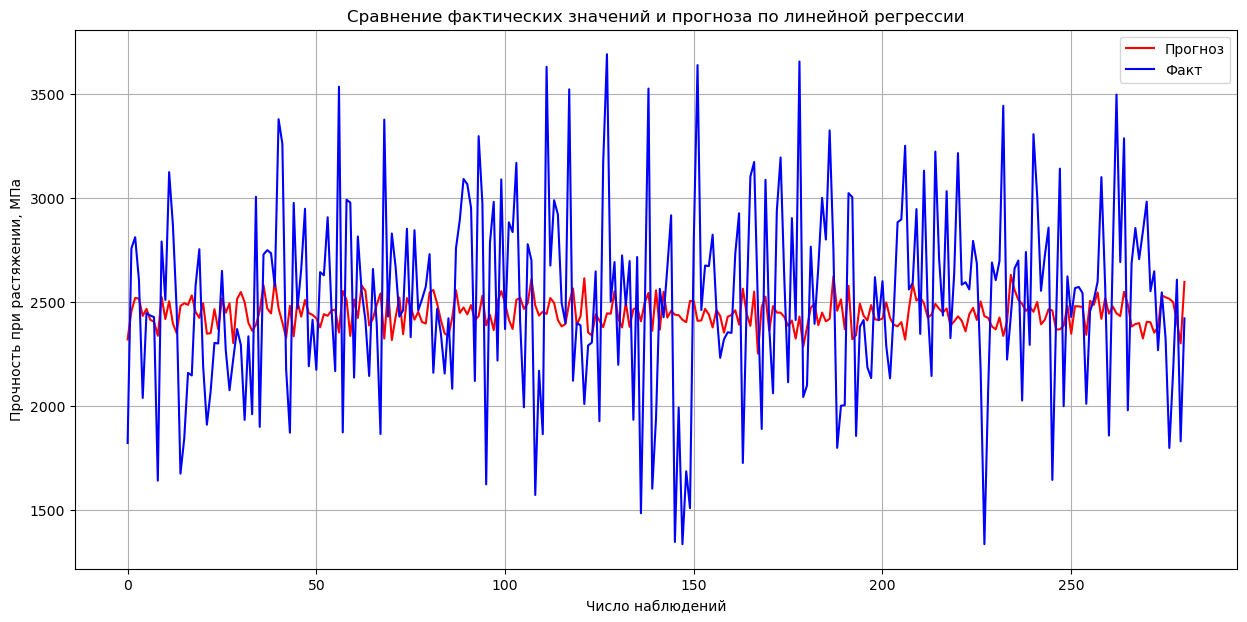

In [31]:
# график сравнения факта и прогноза (Прочность при растяжении):
plt.figure(figsize = (15, 7))
plt.title("Сравнение фактических значений и прогноза по линейной регрессии")
plt.plot(y_pred_lr_1, label="Прогноз", color = 'red')
plt.plot(y_test_1[['Прочность_при_растяжении']].values, label = "Факт", color = 'blue')
plt.xlabel("Число наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True)

Выводы: На графике имеем все прогнозные значения, приближенные к среднему. Наблючается некоторое смещение прогнозных значений относительно фактических.

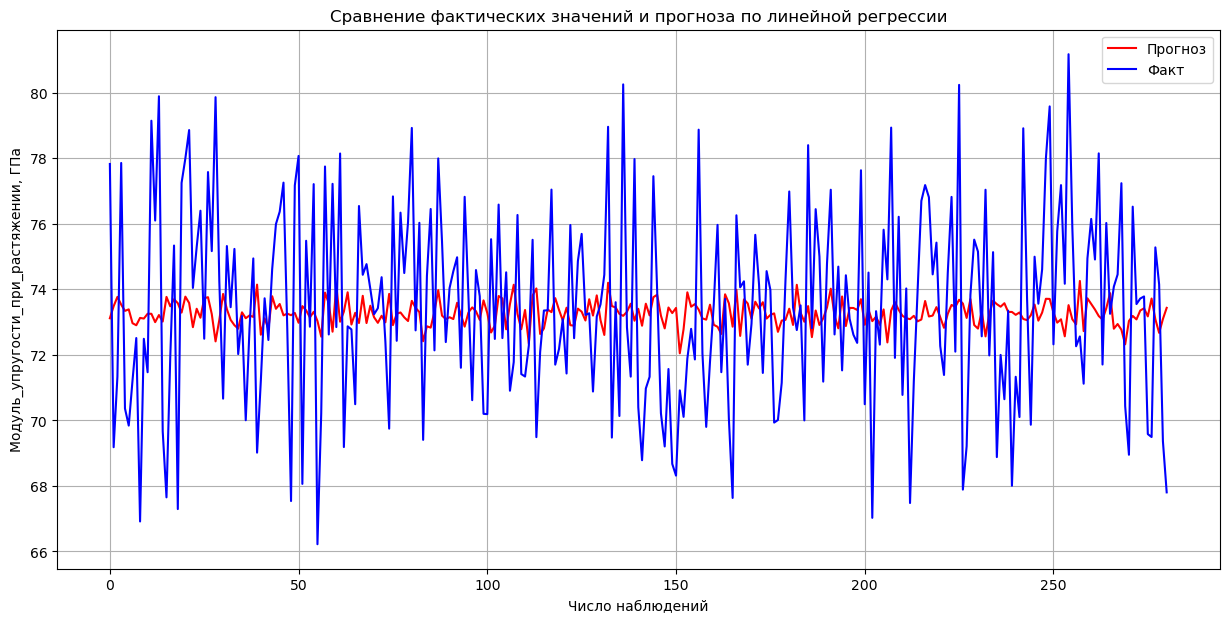

In [32]:
# график сравнения факта и прогноза (Модуль упругости при растяжении):
plt.figure(figsize = (15, 7))
plt.title("Сравнение фактических значений и прогноза по линейной регрессии")
plt.plot(y_pred_lr_2, label="Прогноз", color = 'red')
plt.plot(y_test_2[['Модуль_упругости_при_растяжении']].values, label = "Факт", color = 'blue')
plt.xlabel("Число наблюдений")
plt.ylabel("Модуль_упругости_при_растяжении, ГПа")
plt.legend()
plt.grid(True)

Выводы: На графике имеем все прогнозные значения, приближенные к среднему. Наблючается некоторое смещение прогнозных значений относительно фактических.

б) Случайный лес

In [33]:
# Обучение модели (Прочность при растяжении):
rfr = RandomForestRegressor(n_estimators=15,max_depth=7, random_state=33)
rfr.fit(x_train_1, y_train_1.values)
y1_pred_rf = rfr.predict(x_test_1)

In [34]:
# Обучение модели (Модуль упругости при растяжении):
rfr_2 = RandomForestRegressor(n_estimators=15,max_depth=7, random_state=33)
rfr_2.fit(x_train_2, y_train_2.values)
y2_pred_rf = rfr_2.predict(x_test_2)

In [35]:
# Метрики модели (Прочность при растяжении)
mae_rf_1 = mean_absolute_error(y_test_1, y1_pred_rf)
mse_rf_1 = mean_squared_error(y_test_1, y1_pred_rf)
r2_rf_1 = r2_score(y_test_1, y1_pred_rf)
# Вывод значений метрик
print('Результаты линейной регрессии:')    
print('Средняя абсолютная погрешность модели: ', mae_rf_1)
print('Средняя квадратическая ошибка модели: ', mse_rf_1)
print('Коэфициент детерминации модели: ', r2_rf_1)

Результаты линейной регрессии:
Средняя абсолютная погрешность модели:  371.86240206106737
Средняя квадратическая ошибка модели:  215759.7966960008
Коэфициент детерминации модели:  -0.05709487531006974


In [36]:
# Метрики модели (Модуль упругости при растяжении)
mae_rf_2 = mean_absolute_error(y_test_2, y2_pred_rf)
mse_rf_2 = mean_squared_error(y_test_2, y2_pred_rf)
r2_rf_2 = r2_score(y_test_2, y2_pred_rf)
# Вывод значений метрик
print('Результаты линейной регрессии:')    
print('Средняя абсолютная погрешность модели: ', mae_rf_2)
print('Средняя квадратическая ошибка модели: ', mse_rf_2)
print('Коэфициент детерминации модели: ', r2_rf_2)

Результаты линейной регрессии:
Средняя абсолютная погрешность модели:  2.415135049530831
Средняя квадратическая ошибка модели:  9.092498566945359
Коэфициент детерминации модели:  -0.043408686791732265


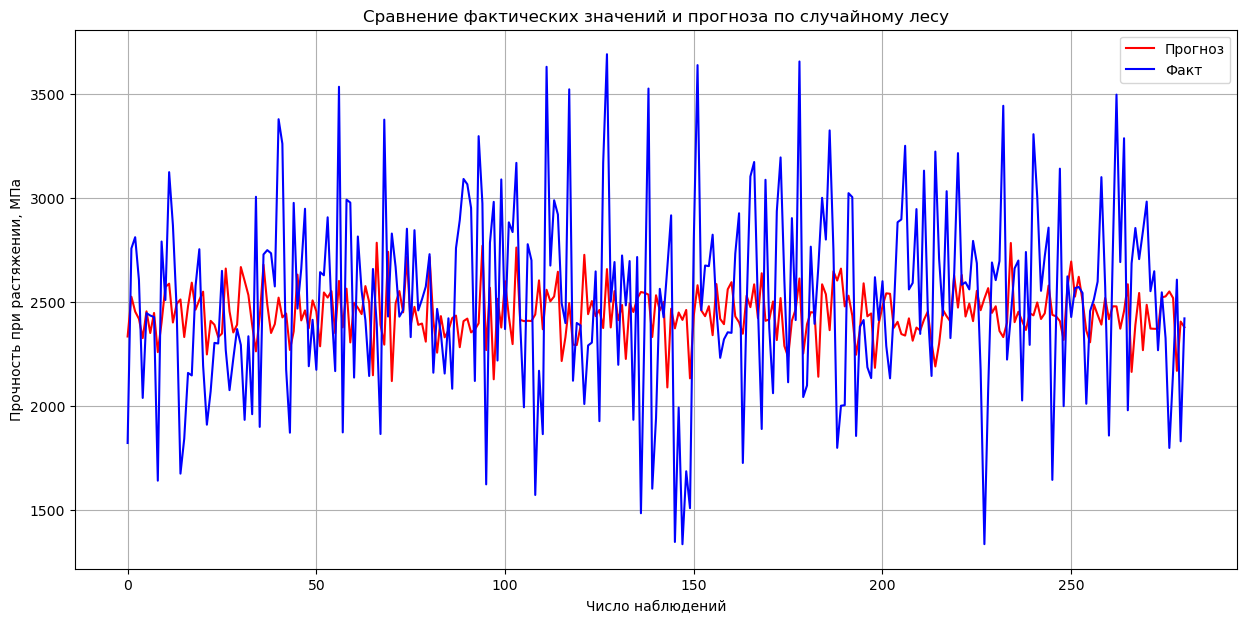

In [37]:
# график сравнения факта и прогноза (Прочность при растяжении)
plt.figure(figsize = (15, 7))
plt.title("Сравнение фактических значений и прогноза по случайному лесу")
plt.plot(y1_pred_rf, label="Прогноз", color = 'red')
plt.plot(y_test_1[['Прочность_при_растяжении']].values, label = "Факт", color = 'blue')
plt.xlabel("Число наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True)

Выводы:

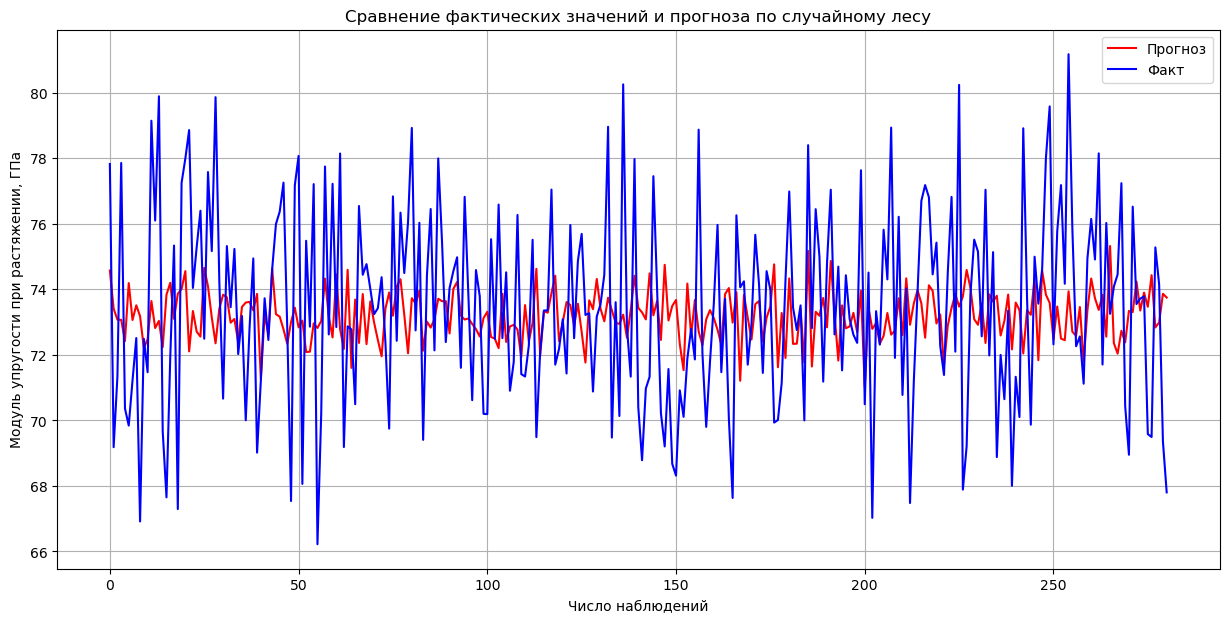

In [38]:
# график сравнения факта и прогноза (Модуль упругости при растяжении)
plt.figure(figsize = (15, 7))
plt.title("Сравнение фактических значений и прогноза по случайному лесу")
plt.plot(y2_pred_rf, label="Прогноз", color = 'red')
plt.plot(y_test_2[['Модуль_упругости_при_растяжении']].values, label = "Факт", color = 'blue')
plt.xlabel("Число наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True)

Выводы:

в) К-ближайших соседей

In [39]:
# Обучение модели (Прочность при растяжении):
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train_1, y_train_1)
y1_pred_knn = knn.predict(x_test_1)

In [40]:
# Обучение модели (Модуль упругости при растяжении):
knn_2 = KNeighborsRegressor(n_neighbors=5)
knn_2.fit(x_train_2, y_train_2)
y2_pred_knn = knn_2.predict(x_test_2)

In [41]:
# Метрики модели (Прочность при растяжении)
mae_knn_1 = mean_absolute_error(y_test_1, y1_pred_knn)
mse_knn_1 = mean_squared_error(y_test_1, y1_pred_knn)
r2_knn_1 = r2_score(y_test_1, y1_pred_knn)
# Вывод значений метрик
print('Результаты линейной регрессии:')    
print('Средняя абсолютная погрешность модели: ', mae_knn_1)
print('Средняя квадратическая ошибка модели: ', mse_knn_1)
print('Коэфициент детерминации модели: ', r2_knn_1)

Результаты линейной регрессии:
Средняя абсолютная погрешность модели:  392.68650180377443
Средняя квадратическая ошибка модели:  257557.98655501226
Коэфициент детерминации модели:  -0.2618811838523105


In [42]:
# Метрики модели (Модуль упругости при растяжении)
mae_knn_2 = mean_absolute_error(y_test_2, y2_pred_knn)
mse_knn_2 = mean_squared_error(y_test_2, y2_pred_knn)
r2_knn_2 = r2_score(y_test_2, y2_pred_knn)
# Вывод значений метрик
print('Результаты линейной регрессии:')    
print('Средняя абсолютная погрешность модели: ', mae_knn_2)
print('Средняя квадратическая ошибка модели: ', mse_knn_2)
print('Коэфициент детерминации модели: ', r2_knn_2)

Результаты линейной регрессии:
Средняя абсолютная погрешность модели:  2.6645046008567808
Средняя квадратическая ошибка модели:  10.645651170064784
Коэфициент детерминации модели:  -0.2216405452931336


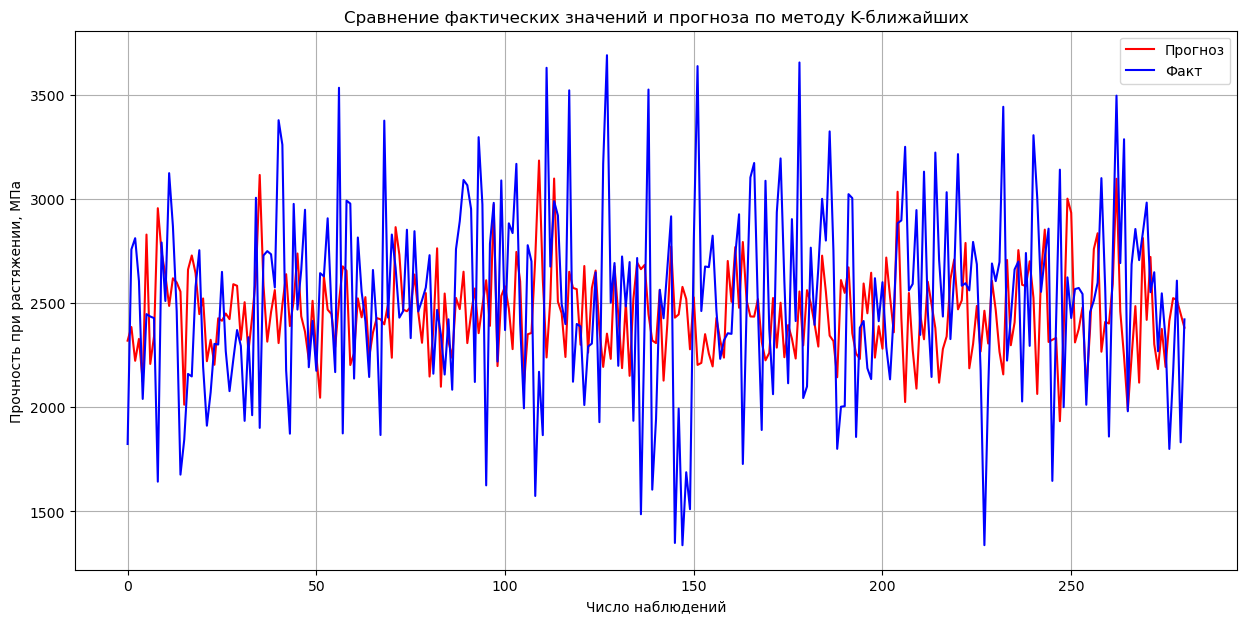

In [43]:
# Визуализация результатов модели (Прочность при растяжении)
plt.figure(figsize = (15, 7))
plt.title("Сравнение фактических значений и прогноза по методу K-ближайших")
plt.plot(y1_pred_knn, label="Прогноз", color = 'red')
plt.plot(y_test_1[['Прочность_при_растяжении']].values, label = "Факт", color = 'blue')
plt.xlabel("Число наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True)

Выводы: 

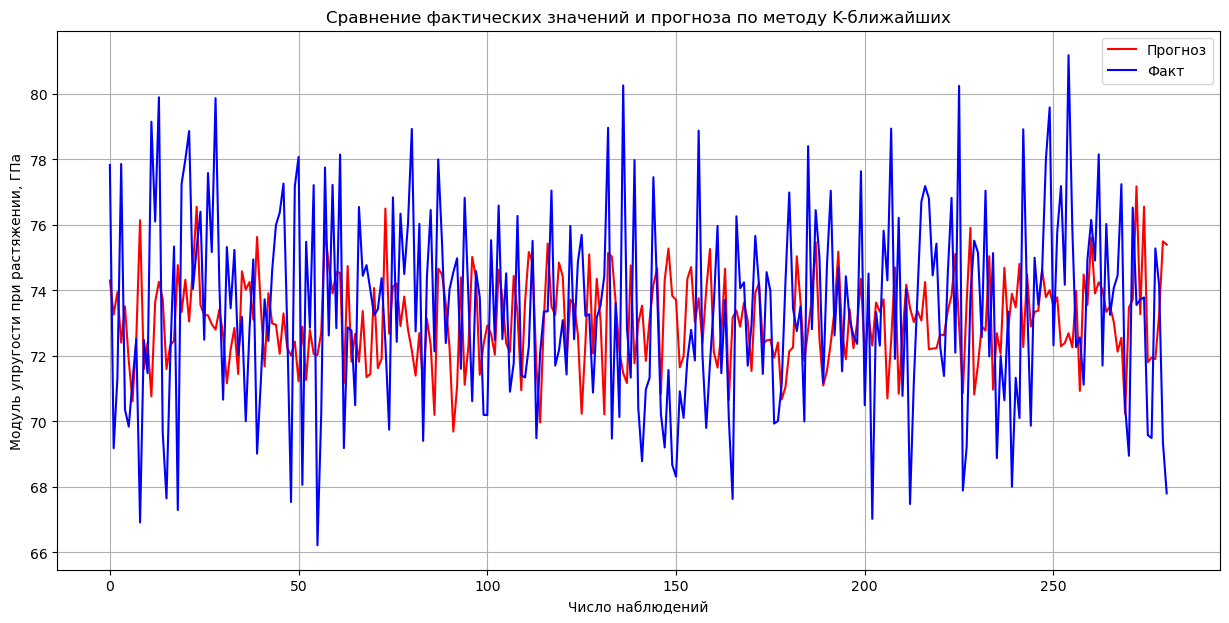

In [44]:
# Визуализация результатов модели (Модуль упругости при растяжении)
plt.figure(figsize = (15, 7))
plt.title("Сравнение фактических значений и прогноза по методу K-ближайших")
plt.plot(y2_pred_knn, label="Прогноз", color = 'red')
plt.plot(y_test_2[['Модуль_упругости_при_растяжении']].values, label = "Факт", color = 'blue')
plt.xlabel("Число наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True)

Выводы:

г) Дерево решений

In [45]:
# Обучение модели (Прочность при растяжении):
dtr = DecisionTreeRegressor()
dtr.fit(x_train_1, y_train_1)
y1_pred_dtr = dtr.predict(x_test_1)

In [46]:
# Обучение модели (Модуль упругости при растяжении):
dtr_2 = DecisionTreeRegressor()
dtr_2.fit(x_train_2, y_train_2)
y2_pred_dtr = dtr_2.predict(x_test_2)

In [47]:
# Метрики модели (Прочность при растяжении)
mae_dtr_1 = mean_absolute_error(y_test_1, y1_pred_dtr)
mse_dtr_1 = mean_squared_error(y_test_1, y1_pred_dtr)
r2_dtr_1 = r2_score(y_test_1, y1_pred_dtr)
# Вывод значений метрик
print('Результаты линейной регрессии:')    
print('Средняя абсолютная погрешность модели: ', mae_dtr_1)
print('Средняя квадратическая ошибка модели: ', mse_dtr_1)
print('Коэфициент детерминации модели: ', r2_dtr_1)

Результаты линейной регрессии:
Средняя абсолютная погрешность модели:  559.9519464312501
Средняя квадратическая ошибка модели:  478217.1446448064
Коэфициент детерминации модели:  -1.3429800205165345


In [48]:
# Метрики модели (Модуль упругости при растяжении)
mae_dtr_2 = mean_absolute_error(y_test_2, y2_pred_dtr)
mse_dtr_2 = mean_squared_error(y_test_2, y2_pred_dtr)
r2_dtr_2 = r2_score(y_test_2, y2_pred_dtr)
# Вывод значений метрик
print('Результаты линейной регрессии:')    
print('Средняя абсолютная погрешность модели: ', mae_dtr_2)
print('Средняя квадратическая ошибка модели: ', mse_dtr_2)
print('Коэфициент детерминации модели: ', r2_dtr_2)

Результаты линейной регрессии:
Средняя абсолютная погрешность модели:  3.4788659479377544
Средняя квадратическая ошибка модели:  17.967456481750883
Коэфициент детерминации модели:  -1.0618535196436674


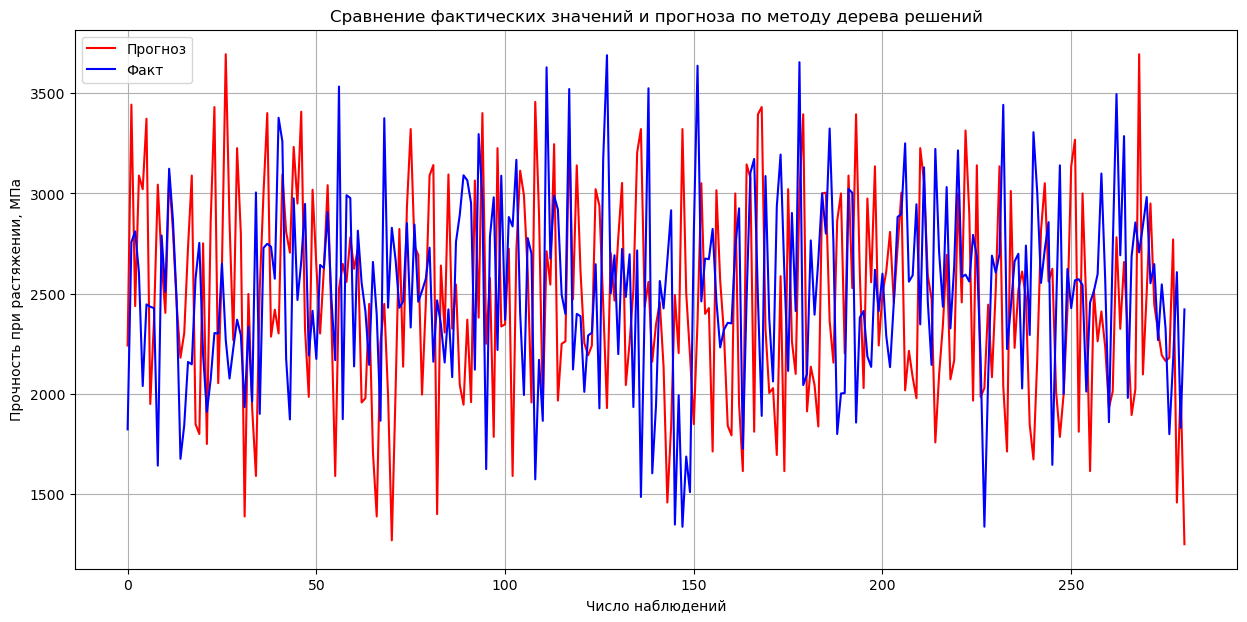

In [49]:
# Визуализация результатов модели (Прочность при растяжении)
plt.figure(figsize = (15, 7))
plt.title("Сравнение фактических значений и прогноза по методу дерева решений")
plt.plot(y1_pred_dtr, label="Прогноз", color = 'red')
plt.plot(y_test_1[['Прочность_при_растяжении']].values, label = "Факт", color = 'blue')
plt.xlabel("Число наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True)

Выводы: Модель не стремится в предсказаниях к средним значениям, но, однако, в большинстве случаев не попадает в нужные точки (имеет смещение прогнозных значений от фактических).

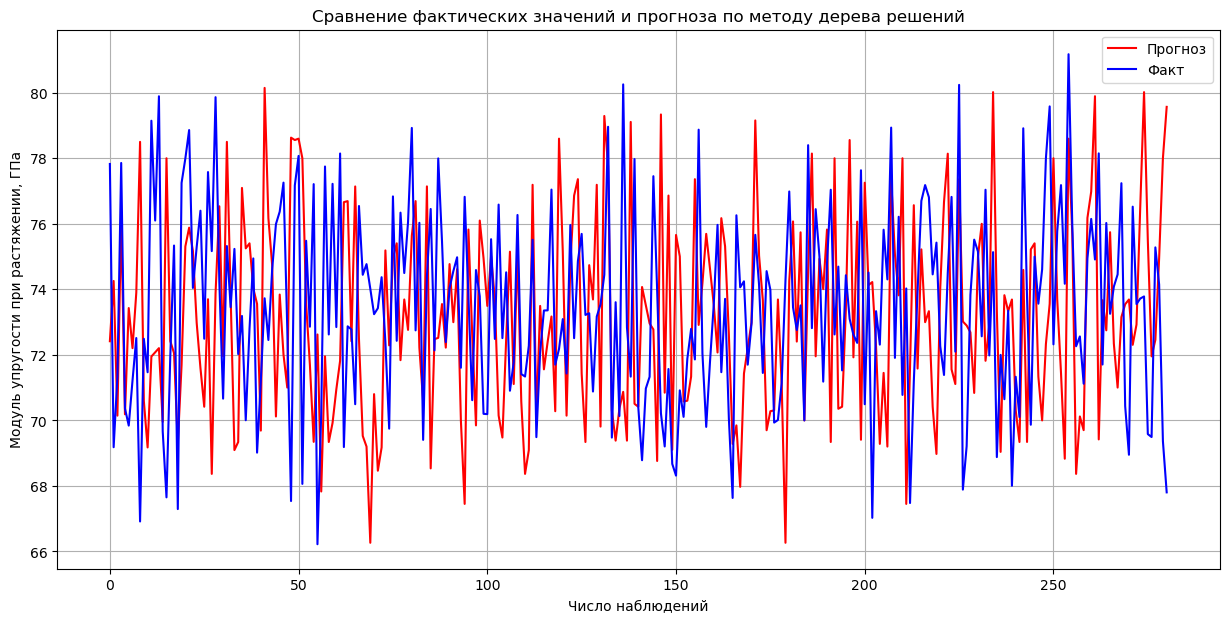

In [50]:
# Визуализация результатов модели (Модуль упругости при растяжении)
plt.figure(figsize = (15, 7))
plt.title("Сравнение фактических значений и прогноза по методу дерева решений")
plt.plot(y2_pred_dtr, label="Прогноз", color = 'red')
plt.plot(y_test_2[['Модуль_упругости_при_растяжении']].values, label = "Факт", color = 'blue')
plt.xlabel("Число наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True)

Выводы: 

д) Метод опорных векторов

In [51]:
# Обучаем модель (Прочность при растяжении)
svr = SVR(kernel = 'rbf', C = 300) # задаём параметры модели
svr.fit(x_train_1, np.ravel(y_train_1)) # преобразование данных (обучение)
y1_pred_svr = svr.predict(x_test_1) # предсказываем значения целевой переменной для тестовой выборки и сохраняем результат в переменную 

In [52]:
# Обучаем модель (Модуль упругости при растяжении)
svr_2 = SVR(kernel = 'rbf', C = 300) # задаём параметры модели
svr_2.fit(x_train_2, np.ravel(y_train_2)) # преобразование данных (обучение)
y2_pred_svr = svr_2.predict(x_test_2) # предсказываем значения целевой переменной для тестовой выборки и сохраняем результат в переменную 

In [53]:
# Метрики модели (Прочность при растяжении)
mae_svr_1 = mean_absolute_error(y_test_1, y1_pred_svr)
mse_svr_1 = mean_squared_error(y_test_1, y1_pred_svr)
r2_svr_1 = r2_score(y_test_1, y1_pred_svr)
# Вывод значений метрик
print('Результаты линейной регрессии:')    
print('Средняя абсолютная погрешность модели: ', mae_svr_1)
print('Средняя квадратическая ошибка модели: ', mse_svr_1)
print('Коэфициент детерминации модели: ', r2_svr_1)

Результаты линейной регрессии:
Средняя абсолютная погрешность модели:  372.50188527151215
Средняя квадратическая ошибка модели:  222357.75709680616
Коэфициент детерминации модели:  -0.08942096308914405


In [54]:
# Метрики модели (Модуль упругости при растяжении)
mae_svr_2 = mean_absolute_error(y_test_2, y2_pred_svr)
mse_svr_2 = mean_squared_error(y_test_2, y2_pred_svr)
r2_svr_2 = r2_score(y_test_2, y2_pred_svr)
# Вывод значений метрик
print('Результаты линейной регрессии:')    
print('Средняя абсолютная погрешность модели: ', mae_svr_2)
print('Средняя квадратическая ошибка модели: ', mse_svr_2)
print('Коэфициент детерминации модели: ', r2_svr_2)

Результаты линейной регрессии:
Средняя абсолютная погрешность модели:  3.2535005521716935
Средняя квадратическая ошибка модели:  17.543411579263797
Коэфициент детерминации модели:  -1.0131922928546682


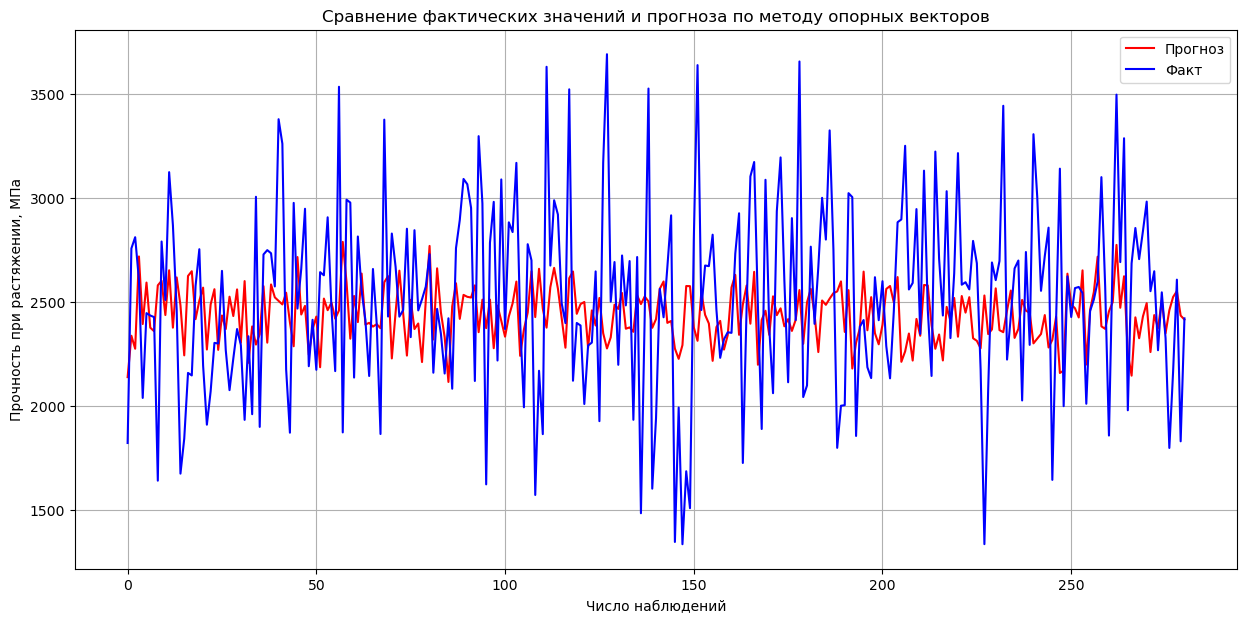

In [55]:
# Визуализация результатов модели (Прочность при растяжении)
plt.figure(figsize = (15, 7))
plt.title("Сравнение фактических значений и прогноза по методу опорных векторов")
plt.plot(y1_pred_svr, label="Прогноз", color = 'red')
plt.plot(y_test_1[['Прочность_при_растяжении']].values, label = "Факт", color = 'blue')
plt.xlabel("Число наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True)

Выводы:

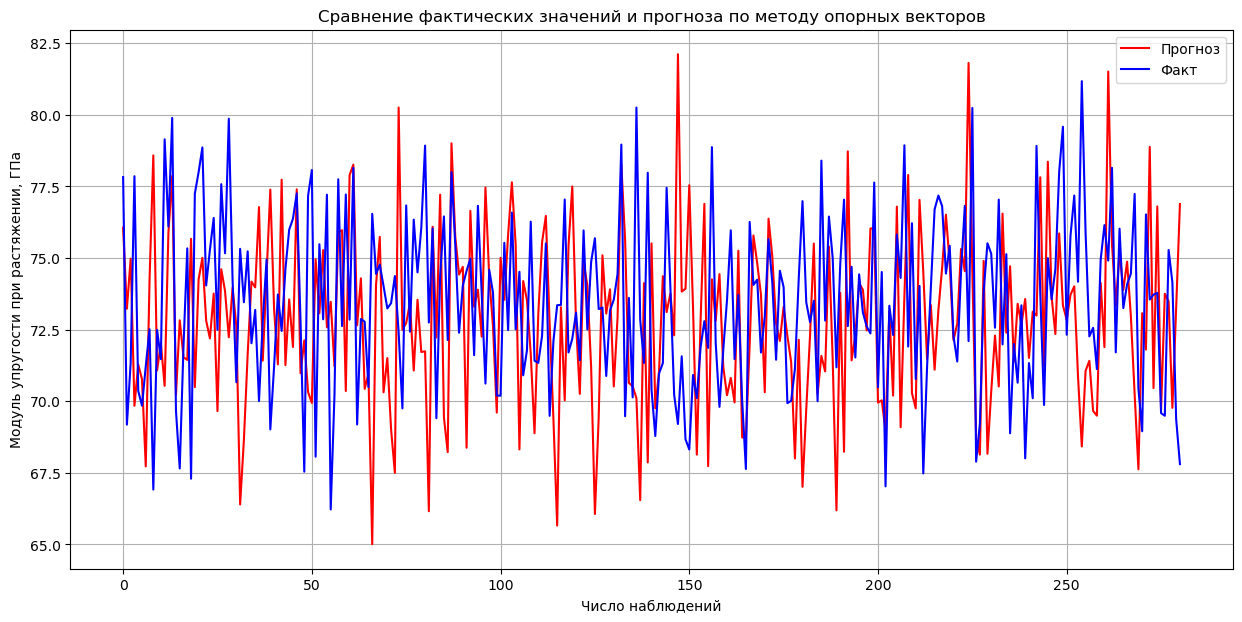

In [56]:
# Визуализация результатов модели (Модуль упругости при растяжении)
plt.figure(figsize = (15, 7))
plt.title("Сравнение фактических значений и прогноза по методу опорных векторов")
plt.plot(y2_pred_svr, label="Прогноз", color = 'red')
plt.plot(y_test_2[['Модуль_упругости_при_растяжении']].values, label = "Факт", color = 'blue')
plt.xlabel("Число наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True)

Выводы: 

е) Градиентный бустинг

In [57]:
# Обучаем модель (Прочность при растяжении)
gbr = make_pipeline(StandardScaler(), GradientBoostingRegressor())
gbr.fit(x_train_1, np.ravel(y_train_1))
y1_pred_gbr = gbr.predict(x_test_1)

In [58]:
# Обучаем модель (Модуль упругости при растяжении)
gbr_2 = make_pipeline(StandardScaler(), GradientBoostingRegressor())
gbr_2.fit(x_train_2, np.ravel(y_train_2))
y2_pred_gbr = gbr_2.predict(x_test_2)

In [59]:
# Метрики модели (Прочность при растяжении)
mae_gbr_1 = mean_absolute_error(y_test_1, y1_pred_gbr)
mse_gbr_1 = mean_squared_error(y_test_1, y1_pred_gbr)
r2_gbr_1 = r2_score(y_test_1, y1_pred_gbr)
# Вывод значений метрик
print('Результаты линейной регрессии:')    
print('Средняя абсолютная погрешность модели: ', mae_gbr_1)
print('Средняя квадратическая ошибка модели: ', mse_gbr_1)
print('Коэфициент детерминации модели: ', r2_gbr_1)

Результаты линейной регрессии:
Средняя абсолютная погрешность модели:  381.8493758546167
Средняя квадратическая ошибка модели:  229100.60104713097
Коэфициент детерминации модели:  -0.12245689422207318


In [60]:
# Метрики модели (Модуль упругости при растяжении)
mae_gbr_2 = mean_absolute_error(y_test_2, y2_pred_gbr)
mse_gbr_2 = mean_squared_error(y_test_2, y2_pred_gbr)
r2_gbr_2 = r2_score(y_test_2, y2_pred_gbr)
# Вывод значений метрик
print('Результаты линейной регрессии:')    
print('Средняя абсолютная погрешность модели: ', mae_gbr_2)
print('Средняя квадратическая ошибка модели: ', mse_gbr_2)
print('Коэфициент детерминации модели: ', r2_gbr_2)

Результаты линейной регрессии:
Средняя абсолютная погрешность модели:  2.495371515771448
Средняя квадратическая ошибка модели:  9.619447337896732
Коэфициент детерминации модели:  -0.10387863584442747


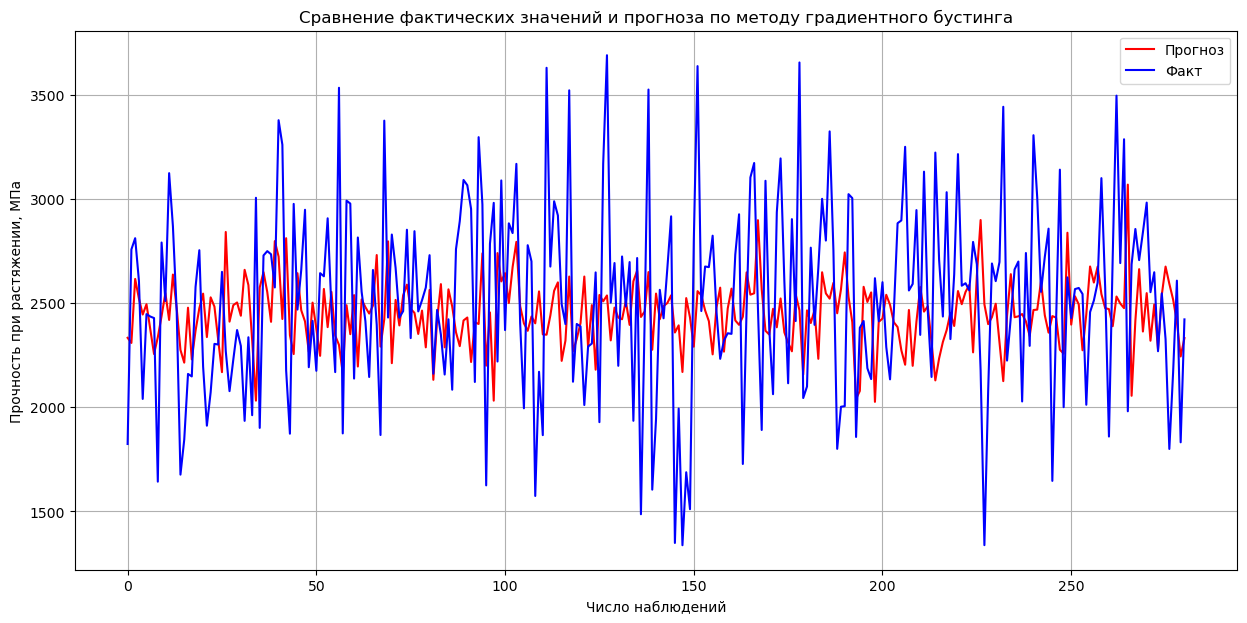

In [61]:
# Визуализация результатов модели (Прочность при растяжении)
plt.figure(figsize = (15, 7))
plt.title("Сравнение фактических значений и прогноза по методу градиентного бустинга")
plt.plot(y1_pred_gbr, label="Прогноз", color = 'red')
plt.plot(y_test_1[['Прочность_при_растяжении']].values, label = "Факт", color = 'blue')
plt.xlabel("Число наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True)

Выводы: 

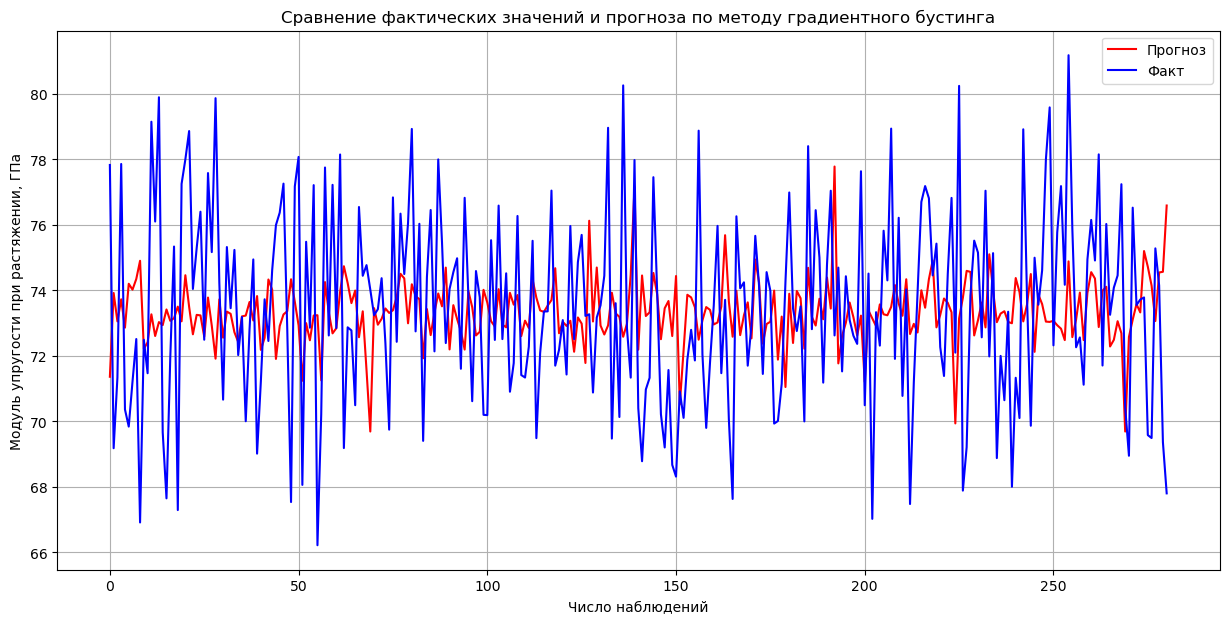

In [62]:
# Визуализация результатов модели (Модуль упругости при растяжении)
plt.figure(figsize = (15, 7))
plt.title("Сравнение фактических значений и прогноза по методу градиентного бустинга")
plt.plot(y2_pred_gbr, label="Прогноз", color = 'red')
plt.plot(y_test_2[['Модуль_упругости_при_растяжении']].values, label = "Факт", color = 'blue')
plt.xlabel("Число наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True)

Выводы: 

Сравнение результатов оценок точности моделей
Сравнение производим по средней абсолютной погрешности и коэффициенту детерминации.

In [64]:
# Сравнение точности моделей (Прочность при растяжении):
score_df_1 = {'Модель для прочности при растяж.': ['Линейная регрессия', 'Случайный лес', 'K-ближайших соседей', 'Дерево решений', 'Метод опорных векторов', 'Градиентный бустинг'], 'MAE': [mae_lr_1, mae_rf_1, mae_knn_1, mae_dtr_1, mae_svr_1, mae_gbr_1], 'Коэффициент детерминации': [r2_lr_1, r2_rf_1, r2_knn_1, r2_dtr_1, r2_svr_1, r2_gbr_1]} 
score_df_1 = pd.DataFrame(score_df_1)
score_df_1

,Модель для прочности при растяж.,MAE,Коэффициент детерминации
0,Линейная регрессия,363.144068,-0.046999
1,Случайный лес,371.862402,-0.057095
2,K-ближайших соседей,392.686502,-0.261881
3,Дерево решений,559.951946,-1.342980
4,Метод опорных векторов,372.501885,-0.089421
5,Градиентный бустинг,381.849376,-0.122457


In [65]:
# Сравнение точности моделей (Модуль упругости при растяжении):
score_df_2 = {'Модель для модуля упругости при растяж.': ['Линейная регрессия', 'Случайный лес', 'K-ближайших соседей', 'Дерево решений', 'Метод опорных векторов', 'Градиентный бустинг'], 'MAE': [mae_lr_2, mae_rf_2, mae_knn_2, mae_dtr_2, mae_svr_2, mae_gbr_2], 'Коэффициент детерминации': [r2_lr_2, r2_rf_2, r2_knn_2, r2_dtr_2, r2_svr_2, r2_gbr_2]} 
score_df_2 = pd.DataFrame(score_df_2)
score_df_2

,Модель для модуля упругости при растяж.,MAE,Коэффициент детерминации
0,Линейная регрессия,2.414573,-0.005222
1,Случайный лес,2.415135,-0.043409
2,K-ближайших соседей,2.664505,-0.221641
3,Дерево решений,3.478866,-1.061854
4,Метод опорных векторов,3.253501,-1.013192
5,Градиентный бустинг,2.495372,-0.103879


Поиск оптимальных гиперпараметров.
Гиперпараметры модели - это такие параметры, которые задаются на входе работы алгоритма и определяют вариативность работы алгоритма. Существует ряд методов поиска оптимальной комбинации гиперпараметров, одним из которых является поиск по сетке.
Метод поиска по сетке рассматривает некоторые комбинации гиперпараметров и выбирает ту, которая дает более низкий балл ошибки. Этот метод особенно полезен, когда есть только некоторые гиперпараметры для оптимизации. Однако он уступает другим методам взвешенно-случайного поиска, когда модель машинного обучения становится более сложной.
Для python используем модуль GridSearchCV из библиотеки Scikit Learn.

Оптимальные гиперпараметры для модели RandomForest (Случайный лес)

1 Для переменной "Прочность при растяжении".

In [76]:
# задаём параметры, оптимальное значение которых нужно найти, и их возможные значения:
parametrs = { 'n_estimators': [200, 300],
              'max_depth': [9, 20],
              'max_features': ['auto'],
              'criterion': ['mae'] }
# обучаем алгоритм поиска:
gs_rf = GridSearchCV(estimator = rfr, param_grid = parametrs, cv = 10)
gs_rf.fit(x_train_1, y_train_1)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_depth=7, n_estimators=15,
                                             random_state=33),
             param_grid={'criterion': ['mae'], 'max_depth': [9, 20],
                         'max_features': ['auto'], 'n_estimators': [200, 300]})

In [77]:
# выводим наилучшую комбинацию пара-
# метров из атрибута best_params_:
gs_rf.best_params_

{'criterion': 'mae',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 200}

In [78]:
#подставляем рекомендованные алгоритмом сетки гиперпараметры в модель случайного леса:
rf_grid = RandomForestRegressor(n_estimators = 200, criterion = 'mae', max_depth = 9, max_features = 'auto')
#Обучаем модель:
rf_grid.fit(x_train_1, y_train_1)
pred_rf_grid_1 = rf_grid.predict(x_test_1)

In [79]:
#Оцениваем точность на тестовой выборке
mae_rf_grid_1 = mean_absolute_error(y_test_1, pred_rf_grid_1)
mse_rf_grid_1 = mean_squared_error(y_test_1, pred_rf_grid_1)
r2_rf_grid_1 = r2_score(y_test_1, pred_rf_grid_1)
# Вывод значений метрик
print('Результаты новых гиперпараметров случайного леса:')    
print('Средняя абсолютная погрешность модели: ', mae_rf_grid_1)
print('Средняя квадратическая ошибка модели: ', mse_rf_grid_1)
print('Коэфициент детерминации модели: ', r2_rf_grid_1)

Результаты новых гиперпараметров случайного леса:
Средняя абсолютная погрешность модели:  369.01172763582156
Средняя квадратическая ошибка модели:  215135.32859455675
Коэфициент детерминации модели:  -0.05403535245205937


In [80]:
# Сравнение с предыдущими результатами:
# Сравнение производим по средней абсолютной погрешности и коэффициенту детерминации:
score_grid_rf = {'Параметры случайного леса': ['Стандартные', 'По сетке с перекрестной проверкой'], 'MAE': [mae_rf_1, mae_rf_grid_1], 'Коэффициент детерминации': [r2_rf_1, r2_rf_grid_1]} 
score_grid_rf = pd.DataFrame(score_grid_rf)
score_grid_rf

,Параметры случайного леса,MAE,Коэффициент детерминации
0,Стандартные,371.862402,-0.057095
1,По сетке с перекрестной проверкой,369.011728,-0.054035


2 Для переменной "Модуль упругости при растяжении".

In [81]:
# задаём параметры, оптимальное значение которых нужно найти, и их возможные значения:
parametrs = { 'n_estimators': [200, 300],
              'max_depth': [9, 20],
              'max_features': ['auto'],
              'criterion': ['mae'] }
# обучаем алгоритм поиска:
gs_rf_2 = GridSearchCV(estimator = rfr, param_grid = parametrs, cv = 10)
gs_rf_2.fit(x_train_2, y_train_2)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_depth=7, n_estimators=15,
                                             random_state=33),
             param_grid={'criterion': ['mae'], 'max_depth': [9, 20],
                         'max_features': ['auto'], 'n_estimators': [200, 300]})

In [82]:
# выводим наилучшую комбинацию параметров из атрибута best_params_:
gs_rf_2.best_params_

{'criterion': 'mae',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 300}

In [83]:
#подставляем рекомендованные алгоритмом сетки гиперпараметры в модель случайного леса:
rf_grid_2 = RandomForestRegressor(n_estimators = 300, criterion = 'mae', max_depth = 9, max_features = 'auto')
#Обучаем модель:
rf_grid_2.fit(x_train_2, y_train_2)
pred_rf_grid_2 = rf_grid_2.predict(x_test_2)

In [84]:
#Оцениваем точность на тестовой выборке
mae_rf_grid_2 = mean_absolute_error(y_test_2, pred_rf_grid_2)
mse_rf_grid_2 = mean_squared_error(y_test_2, pred_rf_grid_2)
r2_rf_grid_2 = r2_score(y_test_2, pred_rf_grid_2)
# Вывод значений метрик
print('Результаты новых гиперпараметров случайного леса:')    
print('Средняя абсолютная погрешность модели: ', mae_rf_grid_2)
print('Средняя квадратическая ошибка модели: ', mse_rf_grid_2)
print('Коэфициент детерминации модели: ', r2_rf_grid_2)

Результаты новых гиперпараметров случайного леса:
Средняя абсолютная погрешность модели:  2.403662930560071
Средняя квадратическая ошибка модели:  8.723934886524955
Коэфициент детерминации модели:  -0.0011142016229788165


In [85]:
# Сравнение с предыдущими результатами:
# Сравнение производим по средней абсолютной погрешности и коэффициенту детерминации:
score_grid_rf_2 = {'Параметры случайного леса': ['Стандартные', 'По сетке с перекрестной проверкой'], 'MAE': [mae_rf_2, mae_rf_grid_2], 'Коэффициент детерминации': [r2_rf_2, r2_rf_grid_2]} 
score_grid_rf_2 = pd.DataFrame(score_grid_rf_2)
score_grid_rf_2

,Параметры случайного леса,MAE,Коэффициент детерминации
0,Стандартные,2.415135,-0.043409
1,По сетке с перекрестной проверкой,2.403663,-0.001114


Оптимальные гиперпараметры для модели KNN (К-ближайших соседей)

1 Для переменной "Прочность при растяжении".

In [86]:
# выводим доступные для оценки метрики
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [87]:
# задаём параметры, оптимальное значение которых нужно найти, и их возможные значения:
knn = KNeighborsRegressor()
knn_params = {'n_neighbors' : range(1, 310, 30), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
# обучаем алгоритм поиска:
gs_knn = GridSearchCV(knn, knn_params, cv = 10, verbose = 1, n_jobs =-1, scoring = 'neg_mean_absolute_error')
gs_knn.fit(x_train_1, y_train_1)

Fitting 10 folds for each of 88 candidates, totalling 880 fits


GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(1, 310, 30),
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error', verbose=1)

In [88]:
# сохраняем лучшего оценщика в отдельную переменную и выводим лучшую комбинацию параметров:
knn_best = gs_knn.best_estimator_
gs_knn.best_params_

{'algorithm': 'auto', 'n_neighbors': 301, 'weights': 'uniform'}

In [89]:
#подставляем рекомендованные алгоритмом сетки гиперпараметры в модель "К-ближайших соседей":
knn_grid_1 = KNeighborsRegressor(algorithm = 'auto', n_neighbors = 301, weights = 'uniform')
#Обучаем модель:
knn_grid_1.fit(x_train_1, y_train_1)
pred_knn_grid_1 = knn_grid_1.predict(x_test_1)

In [90]:
#Оцениваем точность на тестовой выборке
mae_knn_grid_1 = mean_absolute_error(y_test_1, pred_knn_grid_1)
mse_knn_grid_1 = mean_squared_error(y_test_1, pred_knn_grid_1)
r2_knn_grid_1 = r2_score(y_test_1, pred_knn_grid_1)
# Вывод значений метрик
print('Результаты новых гиперпараметров К-ближайших соседей:')    
print('Средняя абсолютная погрешность модели: ', mae_knn_grid_1)
print('Средняя квадратическая ошибка модели: ', mse_knn_grid_1)
print('Коэфициент детерминации модели: ', r2_knn_grid_1)

Результаты новых гиперпараметров К-ближайших соседей:
Средняя абсолютная погрешность модели:  359.8057532940294
Средняя квадратическая ошибка модели:  209986.587808042
Коэфициент детерминации модели:  -0.028809580166996973


In [91]:
# Сравнение с предыдущими результатами:
# Сравнение производим по средней абсолютной погрешности и коэффициенту детерминации:
score_knn_grid_1 = {'Гиперпараметры К-ближайших соседей': ['Стандартные', 'По сетке с перекрестной проверкой'], 'MAE': [mae_knn_1, mae_knn_grid_1], 'Коэффициент детерминации': [r2_knn_1, r2_knn_grid_1]} 
score_knn_grid_1 = pd.DataFrame(score_knn_grid_1)
score_knn_grid_1

,Гиперпараметры К-ближайших соседей,MAE,Коэффициент детерминации
0,Стандартные,392.686502,-0.261881
1,По сетке с перекрестной проверкой,359.805753,-0.028810


2 Для переменной "Модуль упругости при растяжении".

In [92]:
# задаём параметры, оптимальное значение которых нужно найти, и их возможные значения:
knn_2 = KNeighborsRegressor()
knn_params_2 = {'n_neighbors' : range(1, 310, 30), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
# обучаем алгоритм поиска:
gs_knn_2 = GridSearchCV(knn_2, knn_params_2, cv = 10, verbose = 1, n_jobs =-1, scoring = 'neg_mean_absolute_error')
gs_knn_2.fit(x_train_2, y_train_2)

Fitting 10 folds for each of 88 candidates, totalling 880 fits


GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(1, 310, 30),
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error', verbose=1)

In [93]:
# сохраняем лучшего оценщика в отдельную переменную и выводим лучшую комбинацию параметров:
knn_best_2 = gs_knn_2.best_estimator_
gs_knn_2.best_params_

{'algorithm': 'auto', 'n_neighbors': 301, 'weights': 'uniform'}

In [94]:
#подставляем рекомендованные алгоритмом сетки гиперпараметры в модель "К-ближайших соседей":
knn_grid_2 = KNeighborsRegressor(algorithm = 'auto', n_neighbors = 301, weights = 'uniform')
#Обучаем модель:
knn_grid_2.fit(x_train_2, y_train_2)
pred_knn_grid_2 = knn_grid_2.predict(x_test_2)

In [95]:
#Оцениваем точность на тестовой выборке
mae_knn_grid_2 = mean_absolute_error(y_test_2, pred_knn_grid_2)
mse_knn_grid_2 = mean_squared_error(y_test_2, pred_knn_grid_2)
r2_knn_grid_2 = r2_score(y_test_2, pred_knn_grid_2)
# Вывод значений метрик
print('Результаты новых гиперпараметров К-ближайших соседей:')    
print('Средняя абсолютная погрешность модели: ', mae_knn_grid_2)
print('Средняя квадратическая ошибка модели: ', mse_knn_grid_2)
print('Коэфициент детерминации модели: ', r2_knn_grid_2)

Результаты новых гиперпараметров К-ближайших соседей:
Средняя абсолютная погрешность модели:  2.4076143606724405
Средняя квадратическая ошибка модели:  8.761582342376443
Коэфициент детерминации модели:  -0.005434431335618495


In [96]:
# Сравнение с предыдущими результатами:
# Сравнение производим по средней абсолютной погрешности и коэффициенту детерминации:
score_knn_grid_2 = {'Гиперпараметры К-ближайших соседей': ['Стандартные', 'По сетке с перекрестной проверкой'], 'MAE': [mae_knn_2, mae_knn_grid_2], 'Коэффициент детерминации': [r2_knn_2, r2_knn_grid_2]} 
score_knn_grid_2 = pd.DataFrame(score_knn_grid_2)
score_knn_grid_2

,Гиперпараметры К-ближайших соседей,MAE,Коэффициент детерминации
0,Стандартные,2.664505,-0.221641
1,По сетке с перекрестной проверкой,2.407614,-0.005434


Оптимальные гиперпараметры для модели DecisionTreeRegressor (Дерево решений)

1 Для переменной "Прочность при растяжении".

In [97]:
# задаём параметры, оптимальное значение которых нужно найти, и их возможные значения:
criterion = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitter = ['best', 'random']
max_depth = [3,5,7,9,11]
min_samples_leaf = [100,150,200]
min_samples_split = [200,250,300]
max_features = ['auto', 'sqrt', 'log2']
param_grid = {'criterion': criterion,
               'splitter': splitter,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features}
#обучаем алгоритм поиска:
gs_dtr_1 = GridSearchCV(dtr, param_grid, cv = 10, verbose = 1, n_jobs =-1, scoring = 'neg_mean_absolute_error')
gs_dtr_1.fit(x_train_1, y_train_1)
# сохраняем лучшего оценщика в отдельную переменную и выводим лучшую комбинацию параметров:
dtr_best = gs_dtr_1.best_estimator_
gs_dtr_1.best_params_

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits


{'criterion': 'squared_error',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 200,
 'min_samples_split': 200,
 'splitter': 'best'}

In [98]:
#подставляем рекомендованные алгоритмом сетки гиперпараметры в модель "Дерево решений":
dtr_grid_1 = DecisionTreeRegressor(criterion = 'poisson', max_depth = 11, max_features = 'log2',
                                   min_samples_leaf = 200, min_samples_split = 250, splitter = 'best')
#Обучаем модель:
dtr_grid_1.fit(x_train_1, y_train_1)
pred_dtr_grid_1 = dtr_grid_1.predict(x_test_1)

In [99]:
#Оцениваем точность на тестовой выборке
mae_dtr_grid_1 = mean_absolute_error(y_test_1, pred_dtr_grid_1)
mse_dtr_grid_1 = mean_squared_error(y_test_1, pred_dtr_grid_1)
r2_dtr_grid_1 = r2_score(y_test_1, pred_dtr_grid_1)
# Вывод значений метрик
print('Результаты новых гиперпараметров дерева решений:')    
print('Средняя абсолютная погрешность модели: ', mae_dtr_grid_1)
print('Средняя квадратическая ошибка модели: ', mse_dtr_grid_1)
print('Коэфициент детерминации модели: ', r2_dtr_grid_1)

Результаты новых гиперпараметров дерева решений:
Средняя абсолютная погрешность модели:  368.0012820086317
Средняя квадратическая ошибка модели:  220719.88536105005
Коэфициент детерминации модели:  -0.08139636423061591


In [100]:
# Сравнение с предыдущими результатами:
# Сравнение производим по средней абсолютной погрешности и коэффициенту детерминации:
score_df_grid = {'Гиперпараметры дерева решений': ['Стандартные', 'По сетке с перекрестной проверкой'], 'MAE': [mae_dtr_1, mae_dtr_grid_1], 'Коэффициент детерминации': [r2_dtr_1, r2_dtr_grid_1]} 
score_df_grid = pd.DataFrame(score_df_grid)
score_df_grid

,Гиперпараметры дерева решений,MAE,Коэффициент детерминации
0,Стандартные,559.951946,-1.342980
1,По сетке с перекрестной проверкой,368.001282,-0.081396


2 Для переменной "Модуль упругости при растяжении".

In [101]:
# задаём параметры, оптимальное значение которых нужно найти, и их возможные значения:
criterion = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitter = ['best', 'random']
max_depth = [3,5,7,9,11]
min_samples_leaf = [100,150,200]
min_samples_split = [200,250,300]
max_features = ['auto', 'sqrt', 'log2']
param_grid_2 = {'criterion': criterion,
               'splitter': splitter,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features}
#обучаем алгоритм поиска:
gs_dtr_2 = GridSearchCV(dtr, param_grid_2, cv = 10, verbose = 1, n_jobs =-1, scoring = 'neg_mean_absolute_error')
gs_dtr_2.fit(x_train_2, y_train_2)
# сохраняем лучшего оценщика в отдельную переменную и выводим лучшую комбинацию параметров:
dtr_best_2 = gs_dtr_2.best_estimator_
gs_dtr_2.best_params_

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits


{'criterion': 'poisson',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 200,
 'min_samples_split': 250,
 'splitter': 'best'}

In [102]:
#подставляем рекомендованные алгоритмом сетки гиперпараметры в модель "Дерево решений":
dtr_grid_2 = DecisionTreeRegressor(criterion = 'poisson', max_depth = 5, max_features = 'sqrt',
                                   min_samples_leaf = 200, min_samples_split = 250, splitter = 'best')
#Обучаем модель:
dtr_grid_2.fit(x_train_2, y_train_2)
pred_dtr_grid_2 = dtr_grid_2.predict(x_test_2)

In [103]:
#Оцениваем точность на тестовой выборке
mae_dtr_grid_2 = mean_absolute_error(y_test_2, pred_dtr_grid_2)
mse_dtr_grid_2 = mean_squared_error(y_test_2, pred_dtr_grid_2)
r2_dtr_grid_2 = r2_score(y_test_2, pred_dtr_grid_2)
# Вывод значений метрик
print('Результаты новых гиперпараметров дерева решений:')    
print('Средняя абсолютная погрешность модели: ', mae_dtr_grid_2)
print('Средняя квадратическая ошибка модели: ', mse_dtr_grid_2)
print('Коэфициент детерминации модели: ', r2_dtr_grid_2)

Результаты новых гиперпараметров дерева решений:
Средняя абсолютная погрешность модели:  2.4036287632085753
Средняя квадратическая ошибка модели:  8.760403594743854
Коэфициент детерминации модели:  -0.005299164278899093


In [104]:
# Сравнение с предыдущими результатами:
# Сравнение производим по средней абсолютной погрешности и коэффициенту детерминации:
score_df_grid_2 = {'Гиперпараметры дерева решений': ['Стандартные', 'По сетке с перекрестной проверкой'], 'MAE': [mae_dtr_2, mae_dtr_grid_2], 'Коэффициент детерминации': [r2_dtr_2, r2_dtr_grid_2]} 
score_df_grid_2 = pd.DataFrame(score_df_grid_2)
score_df_grid_2

,Гиперпараметры дерева решений,MAE,Коэффициент детерминации
0,Стандартные,3.478866,-1.061854
1,По сетке с перекрестной проверкой,2.403629,-0.005299


Оптимальные гиперпараметры для модели SVR (Метод опорных векторов)

1 Для переменной "Прочность при растяжении".

In [105]:
# задаём параметры, оптимальное значение которых нужно найти, и их возможные значения:
gamma = [0.001, 0.01, 0.1, 1, 10, 100]
C = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid_svr = {'gamma': gamma,'C': C}
#обучаем алгоритм поиска:
gs_svr_1 = GridSearchCV(svr, param_grid_svr, cv = 10, verbose = 1, n_jobs =-1, scoring = 'neg_mean_absolute_error')
gs_svr_1.fit(x_train_1, y_train_1)
# сохраняем лучшего оценщика в отдельную переменную и выводим лучшую комбинацию параметров:
svr_best = gs_svr_1.best_estimator_
gs_svr_1.best_params_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


{'C': 1, 'gamma': 100}

In [106]:
#подставляем рекомендованные алгоритмом сетки гиперпараметры в модель:
svr_grid_1 = SVR(C = 1, gamma = 100)
#Обучаем модель:
svr_grid_1.fit(x_train_1, y_train_1)
pred_svr_grid_1 = svr_grid_1.predict(x_test_1)

In [107]:
#Оцениваем точность на тестовой выборке
mae_svr_grid_1 = mean_absolute_error(y_test_1, pred_svr_grid_1)
mse_svr_grid_1 = mean_squared_error(y_test_1, pred_svr_grid_1)
r2_svr_grid_1 = r2_score(y_test_1, pred_svr_grid_1)
# Вывод значений метрик
print('Результаты новых гиперпараметров метода опорных векторов:')    
print('Средняя абсолютная погрешность модели: ', mae_svr_grid_1)
print('Средняя квадратическая ошибка модели: ', mse_svr_grid_1)
print('Коэфициент детерминации модели: ', r2_svr_grid_1)

Результаты новых гиперпараметров метода опорных векторов:
Средняя абсолютная погрешность модели:  361.3253523980598
Средняя квадратическая ошибка модели:  211298.45041993115
Коэфициент детерминации модели:  -0.03523692791840771


In [108]:
# Сравнение с предыдущими результатами:
# Сравнение производим по средней абсолютной погрешности и коэффициенту детерминации:
score_df_grid_svr = {'Гиперпараметры дерева решений': ['Стандартные', 'По сетке с перекрестной проверкой'], 'MAE': [mae_svr_1, mae_svr_grid_1], 'Коэффициент детерминации': [r2_svr_1, r2_svr_grid_1]} 
score_df_grid_svr = pd.DataFrame(score_df_grid_svr)
score_df_grid_svr

,Гиперпараметры дерева решений,MAE,Коэффициент детерминации
0,Стандартные,372.501885,-0.089421
1,По сетке с перекрестной проверкой,361.325352,-0.035237


2 Для переменной "Модуль упругости при растяжении".

In [109]:
# задаём параметры, оптимальное значение которых нужно найти, и их возможные значения:
gamma = [0.001, 0.01, 0.1, 1, 10, 100]
C = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid_svr_2 = {'gamma': gamma,'C': C}
#обучаем алгоритм поиска:
gs_svr_2 = GridSearchCV(svr, param_grid_svr_2, cv = 10, verbose = 1, n_jobs =-1, scoring = 'neg_mean_absolute_error')
gs_svr_2.fit(x_train_2, y_train_2)
# сохраняем лучшего оценщика в отдельную переменную и выводим лучшую комбинацию параметров:
svr_best = gs_svr_2.best_estimator_
gs_svr_2.best_params_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


{'C': 1, 'gamma': 1}

In [110]:
#подставляем рекомендованные алгоритмом сетки гиперпараметры в модель:
svr_grid_2 = SVR(C = 1, gamma = 100)
#Обучаем модель:
svr_grid_2.fit(x_train_2, y_train_2)
pred_svr_grid_2 = svr_grid_2.predict(x_test_2)

In [111]:
#Оцениваем точность на тестовой выборке
mae_svr_grid_2 = mean_absolute_error(y_test_2, pred_svr_grid_2)
mse_svr_grid_2 = mean_squared_error(y_test_2, pred_svr_grid_2)
r2_svr_grid_2 = r2_score(y_test_2, pred_svr_grid_2)
# Вывод значений метрик
print('Результаты новых гиперпараметров метода опорных векторов:')    
print('Средняя абсолютная погрешность модели: ', mae_svr_grid_2)
print('Средняя квадратическая ошибка модели: ', mse_svr_grid_2)
print('Коэфициент детерминации модели: ', r2_svr_grid_2)

Результаты новых гиперпараметров метода опорных векторов:
Средняя абсолютная погрешность модели:  2.4034585102630515
Средняя квадратическая ошибка модели:  8.807029685070999
Коэфициент детерминации модели:  -0.010649736216885364


In [112]:
# Сравнение с предыдущими результатами:
# Сравнение производим по средней абсолютной погрешности и коэффициенту детерминации:
score_df_grid_svr_2 = {'Гиперпараметры дерева решений': ['Стандартные', 'По сетке с перекрестной проверкой'], 'MAE': [mae_svr_2, mae_svr_grid_2], 'Коэффициент детерминации': [r2_svr_2, r2_svr_grid_2]} 
score_df_grid_svr_2 = pd.DataFrame(score_df_grid_svr_2)
score_df_grid_svr_2

,Гиперпараметры дерева решений,MAE,Коэффициент детерминации
0,Стандартные,3.253501,-1.013192
1,По сетке с перекрестной проверкой,2.403459,-0.010650


Оптимальные гиперпараметры для модели GradientBoostingRegressor (Градиентный бустинг)
Ошибка набора ппраметров - не разобралась, как правильно задать и в чем проблема

#задаём параметры, оптимальное значение которых нужно найти, и их возможные значения:
#n_estimators = [100, 200, 500]
#subsample = [0.5, 1]
#min_samples_split = [2, 3]
steps = ['memory', 'steps', 'verbose']
param_grid_gbr = {'steps': steps}
#обучаем алгоритм поиска:
gs_svr_1 = GridSearchCV(gbr, param_grid_gbr, cv = 10, verbose = 1, n_jobs =-1, scoring = 'neg_mean_absolute_error')
gs_svr_1.fit(x_train_1, y_train_1)
#сохраняем лучшего оценщика в отдельную переменную и выводим лучшую комбинацию параметров:
gbr_best = gs_gbr_1.best_estimator_
gs_gbr_1.best_params_

Выбор модели с наилучшими гиперпараметрами

1 Для переменной "Прочность при растяжении"

In [113]:
# автоматизируем процесс выбора с помощью pipeline:
pipe = Pipeline([('preprocessing', StandardScaler()), ('regressor', SVR())])
param_grid = [
{'regressor': [SVR()], 'preprocessing': [StandardScaler(), MinMaxScaler(), None],
'regressor__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
'regressor__C': [0.001, 0.01, 0.1, 1, 10, 100]},
{'regressor': [RandomForestRegressor(n_estimators = 100)],
'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [LinearRegression()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [GradientBoostingRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [KNeighborsRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [DecisionTreeRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]}]
# для поиска модели с лучшими гиперпараметрами изпользуем поиск по сетке с перекрестной проверкой с 10 блоками:
grid = GridSearchCV(pipe, param_grid, cv = 10)
grid.fit(x_train_1, np.ravel(y_train_1))
# выведем результат поиска:
print("Наилучшие параметры:\n{}\n".format(grid.best_params_))
print("Наилучшее значение правильности перекрестной проверки: {:.2f}".format(grid.best_score_))
print("Правильность на тестовом наборе: {:.2f}".format(grid.score(x_test_1, y_test_1)))

Наилучшие параметры:
{'preprocessing': MinMaxScaler(), 'regressor': SVR(C=1, gamma=10), 'regressor__C': 1, 'regressor__gamma': 10}

Наилучшее значение правильности перекрестной проверки: -0.03
Правильность на тестовом наборе: -0.04


2 Для переменной "Модуль упругости при растяжении"

In [114]:
# автоматизируем процесс выбора с помощью pipeline:
pipe = Pipeline([('preprocessing', StandardScaler()), ('regressor', SVR())])
param_grid_2 = [
{'regressor': [SVR()], 'preprocessing': [StandardScaler(), MinMaxScaler(), None],
'regressor__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
'regressor__C': [0.001, 0.01, 0.1, 1, 10, 100]},
{'regressor': [RandomForestRegressor(n_estimators = 100)],
'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [LinearRegression()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [GradientBoostingRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [KNeighborsRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [DecisionTreeRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]}]
# для поиска модели с лучшими гиперпараметрами изпользуем поиск по сетке с перекрестной проверкой с 10 блоками:
grid_2 = GridSearchCV(pipe, param_grid_2, cv = 10)
grid_2.fit(x_train_2, np.ravel(y_train_2))
# выведем результат поиска:
print("Наилучшие параметры:\n{}\n".format(grid_2.best_params_))
print("Наилучшее значение правильности перекрестной проверки: {:.2f}".format(grid_2.best_score_))
print("Правильность на тестовом наборе: {:.2f}".format(grid_2.score(x_test_2, y_test_2)))

Наилучшие параметры:
{'preprocessing': StandardScaler(), 'regressor': SVR(C=1, gamma=10), 'regressor__C': 1, 'regressor__gamma': 10}

Наилучшее значение правильности перекрестной проверки: -0.03
Правильность на тестовом наборе: -0.01


Сравнение моделей по точности и детерминированности после применения оптимального набора гиперпараметров.
Сравнение производим по средней абсолютной погрешности и коэффициенту детерминации.

In [117]:
# Сравнение для переменной "Прочность при растяжении":
score_df_grid_all = {'Модель для прочности при растяж.': ['Линейная регрессия', 'Случайный лес', 'K-ближайших соседей', 'Дерево решений', 'Метод опорных векторов'], 'MAE': [mae_lr_1, mae_rf_grid_1, mae_knn_grid_1, mae_dtr_grid_1, mae_svr_grid_1], 'Коэффициент детерминации': [r2_lr_1, r2_rf_grid_1, r2_knn_grid_1, r2_dtr_grid_1, r2_svr_grid_1]} 
score_df_grid_all = pd.DataFrame(score_df_grid_all)
score_df_grid_all

,Модель для прочности при растяж.,MAE,Коэффициент детерминации
0,Линейная регрессия,363.144068,-0.046999
1,Случайный лес,369.011728,-0.054035
2,K-ближайших соседей,359.805753,-0.028810
3,Дерево решений,368.001282,-0.081396
4,Метод опорных векторов,361.325352,-0.035237


Выводы: подбор оптимальных гиперпараметров методом сетки с перекрестной проверкой несколько снизили потери, но в целом результата не дали, поскольку показатель MAE по-прежнему высок, а коэффициент детерминации показывает, что результаты моделей неоднозначны и хуже, чем у модели с прогнозом по средней.

In [118]:
# Сравнение для переменной "Модуль упругости при растяжении":
score_df_grid_all_2 = {'Модель для модуля упругости при растяж.': ['Линейная регрессия', 'Случайный лес', 'K-ближайших соседей', 'Дерево решений', 'Метод опорных векторов'], 'MAE': [mae_lr_2, mae_rf_grid_2, mae_knn_grid_2, mae_dtr_grid_2, mae_svr_grid_2], 'Коэффициент детерминации': [r2_lr_2, r2_rf_grid_2, r2_knn_grid_2, r2_dtr_grid_2, r2_svr_grid_2]} 
score_df_grid_all_2 = pd.DataFrame(score_df_grid_all_2)
score_df_grid_all_2

,Модель для модуля упругости при растяж.,MAE,Коэффициент детерминации
0,Линейная регрессия,2.414573,-0.005222
1,Случайный лес,2.403663,-0.001114
2,K-ближайших соседей,2.407614,-0.005434
3,Дерево решений,2.403629,-0.005299
4,Метод опорных векторов,2.403459,-0.010650


Выводы: подбор оптимальных гиперпараметров методом сетки с перекрестной проверкой несколько снизили потери, но в целом результата не дали, поскольку показатель MAE по-прежнему высок, а коэффициент детерминации показывает, что результаты моделей неоднозначны и хуже, чем у модели с прогнозом по средней.
Стоит отметить, что значения коэффициента детерминации алгоритмов в общем у текущей переменной ниже примерно в 10 раз, чем у переменной "Прочность при растяжении".

In [119]:
# сохраняем модель линейной регрессии для предсказания Прочности при растяжении в файл:
joblib_file = "joblib_LR.joblib" 
joblib.dump(LR, joblib_file)

['joblib_LR.joblib']